# Network Data & Software


- Where to find network data
    - Google; search on GitHub (universal solution)
    - http://snap.stanford.edu/data/ (mostly big network)
    - https://networkdata.ics.uci.edu/ (mostly small network)
    - http://networkrepository.com/index.php (a more modern one)

- Software for network data
    - Visualization and basic stuff: Gephi (light-weighted); Cytoscape
    - Python: networkx/igraph
    - R: igraph

- Different formats of network data
- See [Gephi’s document](https://gephi.org/users/supported-graph-formats/
) for example. Differnet software may support differnet formats.
- CSV is the most basic and most transferrable formation. You can just write networks as a matrix, edge list, or adjacency list.

# Network data using Gephi

We use the data on the network of the characters in Les Misérables for illustration.


# NetworkX in Python 

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. https://networkx.org/documentation/stable/index.html

Tutorial Online: https://ericmjl.github.io/Network-Analysis-Made-Simple/

##  Read  raw data

In [1]:
import csv
from operator import itemgetter
import networkx as nx

In [2]:
nx.__version__

'2.5'

- We first use the CSV module to load the nodes and edges. 
- Two datasets: 
    - a list of nodes and 
    - a list of edge pairs (as tuples of nodes).

In [5]:
!head -10 quakers_nodelist.csv

Name,Historical Significance,Gender,Birthdate,Deathdate,ID
Joseph Wyeth,religious writer,male,1663,1731,10013191
Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
James Logan,colonial official and scholar,male,1674,1751,10007567
Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152
William Mucklow,religious writer,male,1630,1713,10008595
Thomas Salthouse,Quaker preacher and writer,male,1630,1691,10010643
William Dewsbury,Quaker activist,male,1621,1688,10003478
John Audland,Quaker preacher,male,1630,1664,10000411


In [6]:
!head -20 quakers_edgelist.csv

Source,Target
George Keith,Robert Barclay
George Keith,Benjamin Furly
George Keith,Anne Conway Viscountess Conway and Killultagh
George Keith,Franciscus Mercurius van Helmont
George Keith,William Penn
George Keith,George Fox
George Keith,George Whitehead
George Keith,William Bradford
James Parnel,Benjamin Furly
James Parnel,Stephen Crisp
Peter Collinson,John Bartram
Peter Collinson,James Logan
Joseph Wyeth,Thomas Ellwood
Alexander Skene of Newtyle,Lilias Skene
Dorcas Erbery,James Nayler
William Mucklow,George Fox
Franciscus Mercurius van Helmont,Benjamin Furly
William Dewsbury,Edward Burrough
William Dewsbury,George Fox


In [7]:
with open('quakers_nodelist.csv', 'r') as nodecsv:
    nodereader = csv.reader(nodecsv) 
    nodes = [n for n in nodereader][1:]
nodes

[['Joseph Wyeth', 'religious writer', 'male', '1663', '1731', '10013191'],
 ['Alexander Skene of Newtyle',
  'local politician and author',
  'male',
  '1621',
  '1694',
  '10011149'],
 ['James Logan',
  'colonial official and scholar',
  'male',
  '1674',
  '1751',
  '10007567'],
 ['Dorcas Erbery', 'Quaker preacher', 'female', '1656', '1659', '10003983'],
 ['Lilias Skene',
  'Quaker preacher and poet',
  'male',
  '1626',
  '1697',
  '10011152'],
 ['William Mucklow', 'religious writer', 'male', '1630', '1713', '10008595'],
 ['Thomas Salthouse',
  'Quaker preacher and writer',
  'male',
  '1630',
  '1691',
  '10010643'],
 ['William Dewsbury', 'Quaker activist', 'male', '1621', '1688', '10003478'],
 ['John Audland', 'Quaker preacher', 'male', '1630', '1664', '10000411'],
 ['Richard Claridge',
  'Quaker minister and schoolmaster',
  'male',
  '1649',
  '1723',
  '10002469'],
 ['William Bradford', 'printer', 'male', '1663', '1752', '10001445'],
 ['Fettiplace Bellers',
  'philosophical wri

In [8]:
node_names = [n[0] for n in nodes] # Get a list of only the node names
node_names

['Joseph Wyeth',
 'Alexander Skene of Newtyle',
 'James Logan',
 'Dorcas Erbery',
 'Lilias Skene',
 'William Mucklow',
 'Thomas Salthouse',
 'William Dewsbury',
 'John Audland',
 'Richard Claridge',
 'William Bradford',
 'Fettiplace Bellers',
 'John Bellers',
 'Isabel Yeamans',
 'George Fox the younger',
 'George Fox',
 'John Stubbs',
 'Anne Camm',
 'John Camm',
 'Thomas Camm',
 'Katharine Evans',
 'Lydia Lancaster',
 'Samuel Clarridge',
 'Thomas Lower',
 'Gervase Benson',
 'Stephen Crisp',
 'James Claypoole',
 'Thomas Holme',
 'John Freame',
 'John Swinton',
 'William Mead',
 'Henry Pickworth',
 'John Crook',
 'Gilbert Latey',
 'Ellis Hookes',
 'Joseph Besse',
 'James Nayler',
 'Elizabeth Hooten',
 'George Whitehead',
 'John Whitehead',
 'William Crouch',
 'Benjamin Furly',
 'Silvanus Bevan',
 'Robert Rich',
 'John Whiting',
 'Christopher Taylor',
 'Thomas Lawson',
 'Richard Farnworth',
 'William Coddington',
 'Thomas Taylor',
 'Richard Vickris',
 'Robert Barclay',
 'Jane Sowle',
 'Ta

In [9]:
with open('quakers_edgelist.csv', 'r') as edgecsv: 
    edgereader = csv.reader(edgecsv) 
    edges = [tuple(e) for e in edgereader][1:]
    
edges

[('George Keith', 'Robert Barclay'),
 ('George Keith', 'Benjamin Furly'),
 ('George Keith', 'Anne Conway Viscountess Conway and Killultagh'),
 ('George Keith', 'Franciscus Mercurius van Helmont'),
 ('George Keith', 'William Penn'),
 ('George Keith', 'George Fox'),
 ('George Keith', 'George Whitehead'),
 ('George Keith', 'William Bradford'),
 ('James Parnel', 'Benjamin Furly'),
 ('James Parnel', 'Stephen Crisp'),
 ('Peter Collinson', 'John Bartram'),
 ('Peter Collinson', 'James Logan'),
 ('Joseph Wyeth', 'Thomas Ellwood'),
 ('Alexander Skene of Newtyle', 'Lilias Skene'),
 ('Dorcas Erbery', 'James Nayler'),
 ('William Mucklow', 'George Fox'),
 ('Franciscus Mercurius van Helmont', 'Benjamin Furly'),
 ('William Dewsbury', 'Edward Burrough'),
 ('William Dewsbury', 'George Fox'),
 ('William Dewsbury', 'John Crook'),
 ('John Audland', 'John Camm'),
 ('John Audland', 'Francis Howgill'),
 ('John Audland', 'Edward Pyott'),
 ('John Audland', 'Charles Marshall'),
 ('John Audland', 'George Fox'),
 

In [11]:
len(node_names)

119

In [10]:
len(edges)

174

## Create a `Graph' object

In [12]:
G = nx.Graph()

- create a “graph object,” a special NetworkX data type, using NetworkX

- This will create a new Graph object, G, with nothing in it. Now you can add your lists of nodes and edges like so:

In [13]:
G.add_nodes_from(node_names)
G.add_edges_from(edges)

- This is one of several ways to add data to a network object. 
- You can check out the [NetworkX documentation](https://networkx.org/documentation/stable/tutorial.html#adding-attributes-to-graphs-nodes-and-edges) for information about adding weighted edges, or adding nodes and edges one-at-a-time.

In [14]:
# check basic information about the graph object
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 119\nNumber of edges: 174\nAverage degree:   2.9244'

## Add Attributes

- For NetworkX, a Graph object is one big thing (your network) made up of two kinds of smaller things (your nodes and your edges). 
- So far we’ve already import the nodes and edges (as pairs of nodes),
- NetworkX also allows us to add attributes to both nodes and edges, providing more information about each of them.


- This list contains all of the rows from quakers_nodelist.csv, including columns for name, historical significance, gender, birth year, death year, and SDFB ID. You’ll want to loop through this list and add this information to our graph. There are a couple ways to do this, but NetworkX provides two convenient functions for adding attributes to all of a Graph’s nodes or edges at once: `nx.set_node_attributes()` and `nx.set_edge_attributes()`. To use these functions, you’ll need your attribute data to be in the form of a **Python dictionary**, in which node names are the keys and the attributes you want to add are the values. You’ll want to create a dictionary for each one of your attributes, and then add them using the functions above. The first thing you must do is create five empty dictionaries, using curly braces:

In [15]:
hist_sig = {}
gender = {}
birth = {}
death = {}
id = {}

- Now we can loop through our nodes list and add the appropriate items to each dictionary. 
- We do this by knowing in advance the position, or index, of each attribute. Because  `quaker_nodelist.csv` file is well-organized, we know that the person’s name will always be the first item in the list: index 0, since you always start counting with 0 in Python. 
- The person’s historical significance will be index 1, their gender will be index 2, and so on. Therefore we can construct our dictionaries like so:6

In [16]:
nodes[:3]

[['Joseph Wyeth', 'religious writer', 'male', '1663', '1731', '10013191'],
 ['Alexander Skene of Newtyle',
  'local politician and author',
  'male',
  '1621',
  '1694',
  '10011149'],
 ['James Logan',
  'colonial official and scholar',
  'male',
  '1674',
  '1751',
  '10007567']]

In [17]:
for node in nodes: # Loop through the list, one row at a time
    hist_sig[node[0]] = node[1]
    gender[node[0]] = node[2]
    birth[node[0]] = node[3]
    death[node[0]] = node[4]
    id[node[0]] = node[5]

- Now we have a set of dictionaries for attributes that can be added to nodes in the Graph object.
- The `set_node_attributes` function takes three variables: 
    - the Graph to which you’re adding the attribute, 
    - the dictionary of id-attribute pairs,
    - the name of the new attribute. 
- The code for adding your six attributes looks like this:

In [18]:
nx.set_node_attributes(G, hist_sig, 'historical_significance')
nx.set_node_attributes(G, gender, 'gender')
nx.set_node_attributes(G, birth, 'birth_year')
nx.set_node_attributes(G, death, 'death_year')
nx.set_node_attributes(G, id, 'sdfb_id')

- Now all of the nodes have these five attributes, 
- Below, we show an example of printing out all the birth years of the nodes by looping through them and accessing the birth_year attribute:

In [19]:
for n in G.nodes(): # Loop through every node, in our data "n" will be the name of the person
    print(n, G.nodes[n]['birth_year']) # Access every node by its name, and then by the attribute "birth_year"

Joseph Wyeth 1663
Alexander Skene of Newtyle 1621
James Logan 1674
Dorcas Erbery 1656
Lilias Skene 1626
William Mucklow 1630
Thomas Salthouse 1630
William Dewsbury 1621
John Audland 1630
Richard Claridge 1649
William Bradford 1663
Fettiplace Bellers 1687
John Bellers 1654
Isabel Yeamans 1637
George Fox the younger 1551
George Fox 1624
John Stubbs 1618
Anne Camm 1627
John Camm 1605
Thomas Camm 1640
Katharine Evans 1618
Lydia Lancaster 1683
Samuel Clarridge 1631
Thomas Lower 1633
Gervase Benson 1569
Stephen Crisp 1628
James Claypoole 1634
Thomas Holme 1626
John Freame 1665
John Swinton 1620
William Mead 1627
Henry Pickworth 1673
John Crook 1616
Gilbert Latey 1626
Ellis Hookes 1635
Joseph Besse 1683
James Nayler 1618
Elizabeth Hooten 1562
George Whitehead 1637
John Whitehead 1630
William Crouch 1628
Benjamin Furly 1636
Silvanus Bevan 1691
Robert Rich 1607
John Whiting 1656
Christopher Taylor 1614
Thomas Lawson 1630
Richard Farnworth 1630
William Coddington 1601
Thomas Taylor 1617
Richard 

## Drawing graphs

NetworkX is not primarily a graph drawing package but basic drawing with Matplotlib as well as an interface to use the open source Graphviz software package are included. These are part of the networkx.drawing module and will be imported if possible.

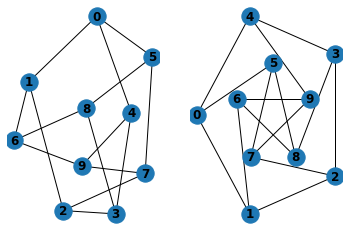

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

G1 = nx.petersen_graph()

plt.subplot(121)
nx.draw(G1, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G1, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()
plt.savefig("network.png")

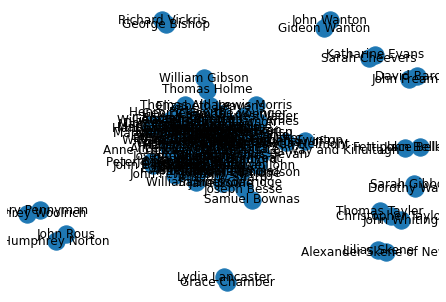

<Figure size 432x288 with 0 Axes>

In [21]:
nx.draw(G, with_labels=True)
plt.show()
plt.savefig("network_2.png")

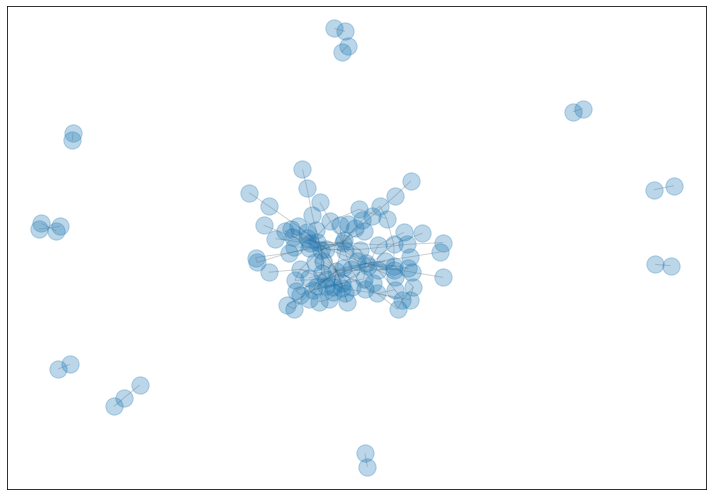

In [22]:
plt.figure(figsize=(10,7))

nx.draw_networkx(G, alpha=0.3, with_labels=False, edge_color='.4')
plt.tight_layout()

## Metrics available in NetworkX

### Network Density

You can calculate network density by running nx.density(G). 

In [23]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.02478279447372169


In this case, the density of our network is approximately 0.0248. On a scale of 0 to 1, not a very dense network, which comports with what you can see in the visualization. 

A 0 would mean that there are no connections at all, and a 1 would indicate that all possible edges are present (a perfectly connected network)

This network we created is on the lower end of that scale, but still far from 0.

### Shortest Path

- A shortest path measurement calculates the shortest possible series of nodes and edges that stand between any two nodes, something hard to see in large network visualizations. 

- This measure is essentially finding friends-of-friends—if my mother knows someone that I don’t, then mom is the shortest path between me and that person. 

- To calculate a shortest path, you’ll need to pass several input variables (information you give to a Python function): the whole graph, your source node, and your target node.

- An example: the shortest path between `Margaret Fell` and `George Whitehead`.

- Since we used names to uniquely identify our nodes in the network, you can access those nodes (as the source and target of your path), using the names directly.

In [24]:
fell_whitehead_path = nx.shortest_path(G, source="Margaret Fell", target="George Whitehead")

print("Shortest path between Fell and Whitehead:", fell_whitehead_path)

Shortest path between Fell and Whitehead: ['Margaret Fell', 'George Fox', 'George Whitehead']


In [25]:
print("Length of that path:", len(fell_whitehead_path)-1)

Length of that path: 2


### Connectivity

In [26]:
# If your Graph has more than one component, this will return False:
nx.is_connected(G)

False

In [27]:
# Next, use nx.connected_components to get the list of components,
components = nx.connected_components(G)
# then use the max() command to find the largest one:
largest_component = max(components, key=len)

largest_component

{'Alexander Parker',
 'Alice Curwen',
 'Anne Camm',
 'Anne Conway Viscountess Conway and Killultagh',
 'Anthony Pearson',
 'Anthony Sharp',
 'Benjamin Furly',
 'Charles Marshall',
 'Daniel Quare',
 'David Barclay of Ury',
 'David Lloyd',
 'Dorcas Erbery',
 'Edward Burrough',
 'Edward Haistwell',
 'Edward Pyott',
 'Elizabeth Hooten',
 'Elizabeth Leavens',
 'Ellis Hookes',
 'Francis Bugg',
 'Francis Howgill',
 'Franciscus Mercurius van Helmont',
 'George Fox',
 'George Fox the younger',
 'George Keith',
 'George Whitehead',
 'Gervase Benson',
 'Gilbert Latey',
 'Hannah Stranger',
 'Henry Pickworth',
 'Isaac Norris',
 'Isabel Yeamans',
 'James Claypoole',
 'James Logan',
 'James Nayler',
 'James Parnel',
 'Jane Sowle',
 'John Audland',
 'John Bartram',
 'John Burnyeat',
 'John Camm',
 'John Crook',
 'John Penington',
 'John Perrot',
 'John Story',
 'John Stubbs',
 'John Swinton',
 'John Whitehead',
 'John Wilkinson',
 'John ap John',
 'Joseph Besse',
 'Joseph Wyeth',
 'Leonard Fell',
 'Le

In [28]:
# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like we did with density.

subgraph = G.subgraph(largest_component) # effectively the 'filter' we see in Gephi
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

Network diameter of largest component: 8


### Degree

In [29]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [30]:
G.nodes['William Penn']

{'historical_significance': 'Quaker leader and founder of Pennsylvania',
 'gender': 'male',
 'birth_year': '1644',
 'death_year': '1718',
 'sdfb_id': '10009531',
 'degree': 18}

In [31]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

You can sort betweenness (or eigenvector) centrality by changing the variable names in the sorting code above, as:

In [32]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('George Fox', 22)
('William Penn', 18)
('James Nayler', 16)
('George Whitehead', 13)
('Margaret Fell', 13)
('Benjamin Furly', 10)
('Edward Burrough', 9)
('George Keith', 8)
('Thomas Ellwood', 8)
('Francis Howgill', 7)
('John Perrot', 7)
('John Audland', 6)
('Richard Farnworth', 6)
('Alexander Parker', 6)
('John Story', 6)
('John Stubbs', 5)
('Thomas Curtis', 5)
('John Wilkinson', 5)
('William Caton', 5)
('Anthony Pearson', 5)


## Exporting Data

NetworkX supports a very large number of file formats for data export. You could even export your graph as a Pandas dataframe if there were more advanced statistical operations you wanted to run. 

Most of the export options work in roughly the same way, so for this tutorial you’ll learn how to export your data into Gephi’s GEXF format. Once you’ve exported the file, you can upload it directly into Gephi for visualization.

In [33]:
nx.write_gexf(G, 'quaker_network.gexf')

In [34]:
G = nx.read_gexf('quaker_network.gexf')

In [35]:
G.nodes['William Penn']

{'historical_significance': 'Quaker leader and founder of Pennsylvania',
 'gender': 'male',
 'birth_year': '1644',
 'death_year': '1718',
 'sdfb_id': '10009531',
 'degree': 18,
 'label': 'William Penn'}